# Online Retails Purchase

### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

### Dataset
Utilize os dados do arquivo em <a href="https://archive.ics.uci.edu/ml/datasets/online+retail">'data/Online_Retail.csv'</a> para esses exercícios.
Obs: se encontrar um erro de utf-8 decode, adicione o `encoding = 'latin1'` na leitura dos dados.

In [16]:
df = pd.read_csv('data/Online_Retail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/2011 12:50,4.15,12680.0,France


In [24]:
df[df["Description"]=="WHITE HANGING HEART T-LIGHT HOLDER"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 08:26,2.55,17850.0,United Kingdom
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 09:02,2.55,17850.0,United Kingdom
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 09:32,2.55,17850.0,United Kingdom
220,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,1/12/2010 10:19,2.55,17511.0,United Kingdom
262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,1/12/2010 10:39,2.55,13408.0,United Kingdom
...,...,...,...,...,...,...,...,...
537291,581246,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,8/12/2011 10:59,2.95,15453.0,United Kingdom
537326,581253,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,8/12/2011 11:15,2.95,16891.0,United Kingdom
537852,581356,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,8/12/2011 12:28,2.95,17830.0,United Kingdom
539979,581452,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,8/12/2011 18:03,2.55,17675.0,United Kingdom


In [19]:
df[df["Description"]=="BAKING SET 9 PIECE RETROSPOT"]#Nada?
df[df["Description"]=="BAKING SET 9 PIECE RETROSPOT"]["StockCode"].unique()

array([], dtype=object)

In [21]:
df["Description"].nunique()

4223

In [ ]:
#Ver se Cada Description tem só um StockCode
#Todo customerID tem a mesma nota fiscal? O "site" guarda as info de um mesmo cliente p/ próxima compra?
#Todo customerID tem mesmo country?
#Toda nota fiscal tem mesmo country?

### Análise geral dos dados
Aproveite esse espaço para entender melhor seus dados, sua estrutura e estatística básica. <br> 
Você consegue perceber algo de estranho?

Resolva o problema encontrado nos dados

Crie um histograma com os dados de UnitPrice e um com Quantity em uma mesma Figure. Adicione título a cada gráfico

C:\Users\Carol\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


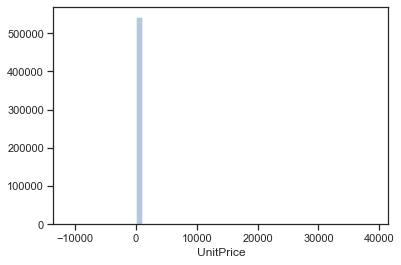

In [33]:
sns.distplot(df["UnitPrice"], kde=False);

C:\Users\Carol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


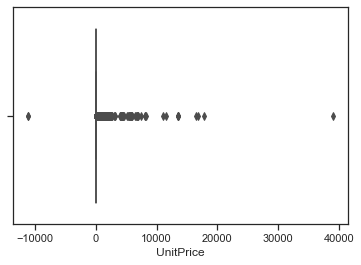

In [29]:
sns.boxplot(df["UnitPrice"]);

C:\Users\Carol\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


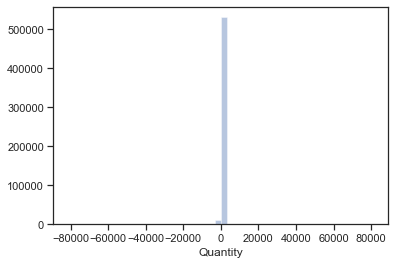

In [51]:
sns.distplot(df["Quantity"], kde=False);

C:\Users\Carol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


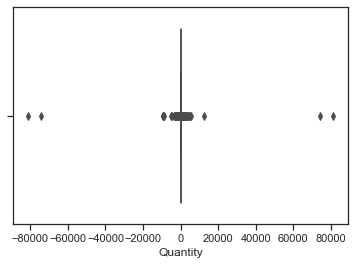

In [50]:
sns.boxplot(df["Quantity"]);

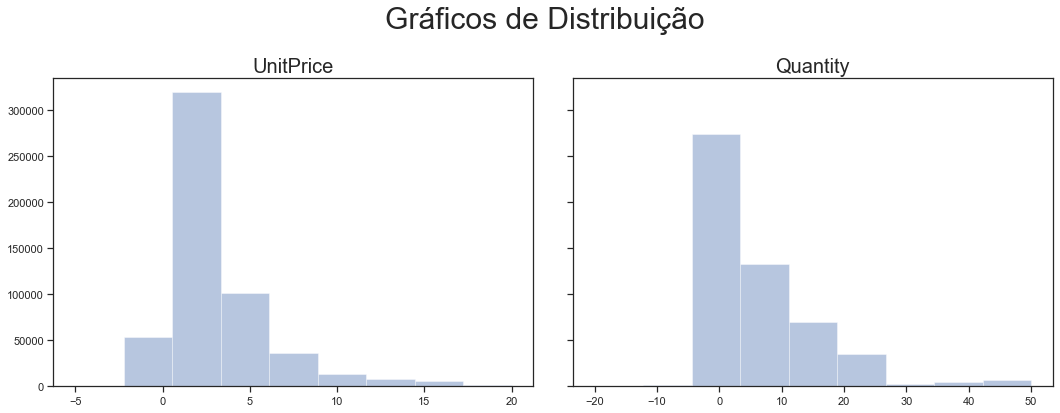

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(15,6), sharey=True)

fig.suptitle('Gráficos de Distribuição', fontsize=30)
fig.tight_layout(pad=2)

axes[0].set_title('UnitPrice', fontsize=20)
axes[1].set_title('Quantity', fontsize=20)

sns.distplot(df["UnitPrice"], kde=False, bins=np.linspace(-5, 20, 10), ax=axes[0])
sns.distplot(df["Quantity"], kde=False, bins=np.linspace(-20, 50, 10), ax=axes[1]);

axes[0].set_xlabel('')
axes[1].set_xlabel('');

Crie um gráfico de barras com os 10 países com maior quantidade comprada, com exceção do UK contendo labels para o eixo x, y e título

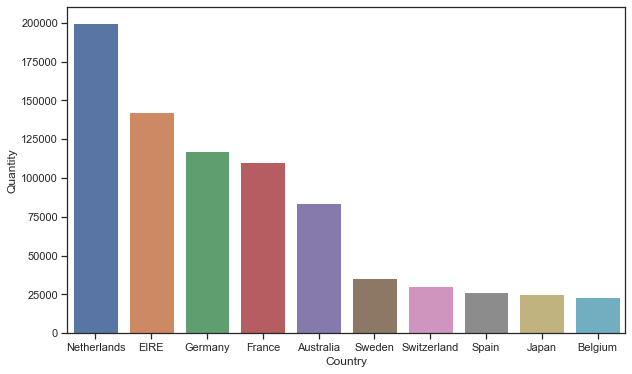

In [96]:
top10_quantidade = pd.DataFrame(df.groupby("Country")["Quantity"].sum().sort_values(ascending=False)[1:11]).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(y="Quantity", x="Country", data=top10_quantidade);

E por receita financeira?

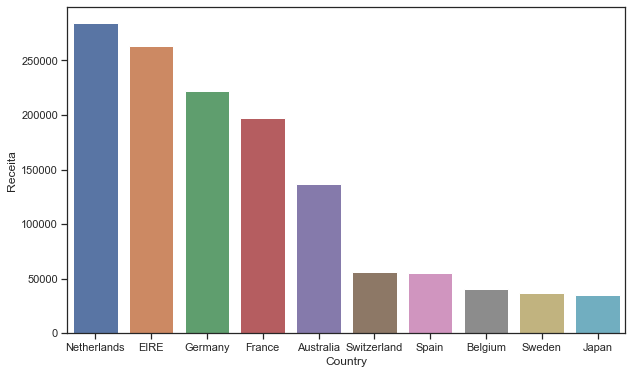

In [121]:
top10_receita = pd.DataFrame(df.groupby("Country").apply(lambda x: (x["Quantity"] * x["UnitPrice"]).sum()).sort_values(ascending=False)[1:11]).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(y=0, x="Country", data=top10_receita)
plt.ylabel("Receita");

Encontre os 10 `CustomerID` dos top 3 países selecionados acima que possuem o maior preço médio por unidade durante esse período.

In [138]:
top3_country = df[(df["Country"] == "Netherlands")|(df["Country"] == "EIRE")|(df["Country"] == "Germany")]
customers_preço_medio = top3_country.groupby(["Country", "CustomerID"]).apply(lambda x: ((x["Quantity"] * x["UnitPrice"]).sum()) / (x["Quantity"].sum()))
pd.DataFrame(customers_preço_medio).reset_index().sort_values(0, ascending=False).iloc[0:10].rename({0: "UnitPrice_Médio"}, axis=1)

,Country,CustomerID,UnitPrice_Médio
102,Netherlands,12789.0,22.962500
49,Germany,12603.0,11.550000
90,Germany,13811.0,8.832090
54,Germany,12614.0,4.152632
79,Germany,12702.0,4.132075
85,Germany,12712.0,4.062864
12,Germany,12477.0,3.623483
47,Germany,12600.0,3.338991
77,Germany,12693.0,3.323840
4,Germany,12427.0,3.001568


Crie uma coluna 'YearMonth' e faça um único gráfico que contenha a receita e quantidade vendida ao longo do tempo.

Crie intervalos de uma unidade para a coluna `UnitPrice` para valores entre [0,50) e plote um gráfico quantidade vendida por receita financeira. Dê nome aos eixos e deixe os xtickers bonitos.

### BONUS: Bar Chart Race

Utilize a biblioteca <a href='https://www.dunderdata.com/blog/official-release-of-bar_chart_race-a-python-package-for-creating-animated-bar-chart-races'>bar chart race</a> para criar um gráfico animado com a quantidade vendida no online market por país e ano-mês.